#### Dataset Analysis and Network Construction

In [1]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'

##### Load and Inspect Datasets

In [3]:
# Function to load datasets with error handling
def load_dataset(file_path, column_names):
    try:
        # Load dataset
        data = pd.read_csv(file_path, header=None)
        data.columns = column_names
        return data
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        raise
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty or corrupted.")
        raise
    except Exception as e:
        print(f"An unexpected error occurred while loading '{file_path}': {e}")
        raise


In [4]:
# Define column names for datasets
airport_columns = [
    'Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO',
    'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
    'Tz Database Timezone', 'Type', 'Source'
]

route_columns = [
    'Airline', 'Airline ID', 'Source', 'Source ID', 'Destination',
    'Destination ID', 'Codeshare', 'Stops', 'Equipment'
]

# Load datasets
airports = load_dataset(f'{data_path}airports.dat', airport_columns)
routes = load_dataset(f'{data_path}routes.dat', route_columns)


airports.replace(r'\\N', None, inplace=True, regex=True)

In [5]:
print("\nRoutes Data (First 5 Rows):")
routes


Routes Data (First 5 Rows):


,Airline,Airline ID,Source,Source ID,Destination,Destination ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [6]:
print("Airports Data (First 5 Rows):")
airports

Airports Data (First 5 Rows):


,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz Database Timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,None,ULDA,71.616699,52.478298,272,None,None,None,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,None,XIUW,51.849998,107.737999,1670,None,None,None,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,None,ULLK,58.625000,31.385000,85,None,None,None,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,None,None,None,airport,OurAirports


In [7]:
print(routes.info())
print(airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         67663 non-null  object
 1   Airline ID      67663 non-null  object
 2   Source          67663 non-null  object
 3   Source ID       67663 non-null  object
 4   Destination     67663 non-null  object
 5   Destination ID  67663 non-null  object
 6   Codeshare       14597 non-null  object
 7   Stops           67663 non-null  int64 
 8   Equipment       67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7698 non-null   int64  
 1   Name                  7698 non-null   object 
 2   City                  7649 non-null  

##### Dataset Cleaning and Sanity Checks

In [8]:
# Function to clean datasets
def clean_dataset(data, subset_columns, description):
    initial_rows = len(data)
    data = data.dropna(subset=subset_columns)
    rows_after_na_removal = len(data)
    print(f"{description}: Removed {initial_rows - rows_after_na_removal} rows with missing values.")

    data = data.drop_duplicates()
    rows_after_deduplication = len(data)
    print(f"{description}: Removed {rows_after_na_removal - rows_after_deduplication} duplicate rows.")

    return data

# Function to handle duplicate IATA codes
def handle_duplicate_iata(data):
    duplicates = data[data.duplicated(subset=['IATA'], keep=False)]
    if not duplicates.empty:
        print("\nDuplicate IATA Codes:")
        print(duplicates)

    data = data.drop_duplicates(subset=['IATA'], keep='first')
    print(f"Removed {len(duplicates) // 2} duplicate IATA entries, keeping the first occurrence.")

    return data

# Clean the datasets
airports = clean_dataset(airports, ['IATA', 'Latitude', 'Longitude'], "Airports Dataset")
routes = clean_dataset(routes, ['Source', 'Destination'], "Routes Dataset")

# Handle duplicate IATA codes in airports dataset
airports = handle_duplicate_iata(airports)

# Verify cleaned datasets
print("\nCleaned Airports Data (First 5 Rows):")
print(airports.head())
print("\nCleaned Routes Data (First 5 Rows):")
print(routes.head())


Airports Dataset: Removed 1626 rows with missing values.
Airports Dataset: Removed 0 duplicate rows.
Routes Dataset: Removed 0 rows with missing values.
Routes Dataset: Removed 0 duplicate rows.
Removed 0 duplicate IATA entries, keeping the first occurrence.

Cleaned Airports Data (First 5 Rows):
   Airport ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua

##### Single-Layer Network Construction

In [ ]:
# Function to create airport coordinates dictionary
def create_airport_coords(data):
    if not data['IATA'].is_unique:
        raise ValueError("IATA codes must be unique for creating the coordinates dictionary.")
    return data.set_index('IATA')[['Latitude', 'Longitude']].to_dict('index')

# Function to construct a directed graph
def construct_graph(airports, routes, coords):
    G = nx.DiGraph()

    # Add nodes
    for _, row in airports.iterrows():
        G.add_node(row['IATA'], name=row['Name'], country=row['Country'])

    # Add edges
    valid_routes = routes[(routes['Source'].isin(coords)) & (routes['Destination'].isin(coords))]
    G.add_edges_from(zip(valid_routes['Source'], valid_routes['Destination']))

    return G

# Function to visualize the graph
def visualize_graph(graph, title="Graph Visualization"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, seed=42)  # Consistent layout for reproducibility
    nx.draw(graph, pos, with_labels=False, node_size=20, font_size=8)
    plt.title(title)
    plt.show()

# Create airport coordinates dictionary
airport_coords = create_airport_coords(airports)

# Construct the directed graph
G = construct_graph(airports, routes, airport_coords)

# Print basic graph statistics
print("\nGraph Statistics:")
print(f"Number of nodes (airports): {G.number_of_nodes()}")
print(f"Number of edges (routes): {G.number_of_edges()}")

# Visualize the single-layer graph
visualize_graph(G, "Single-Layer Airline Network")



Graph Statistics:
Number of nodes (airports): 6072
Number of edges (routes): 37042


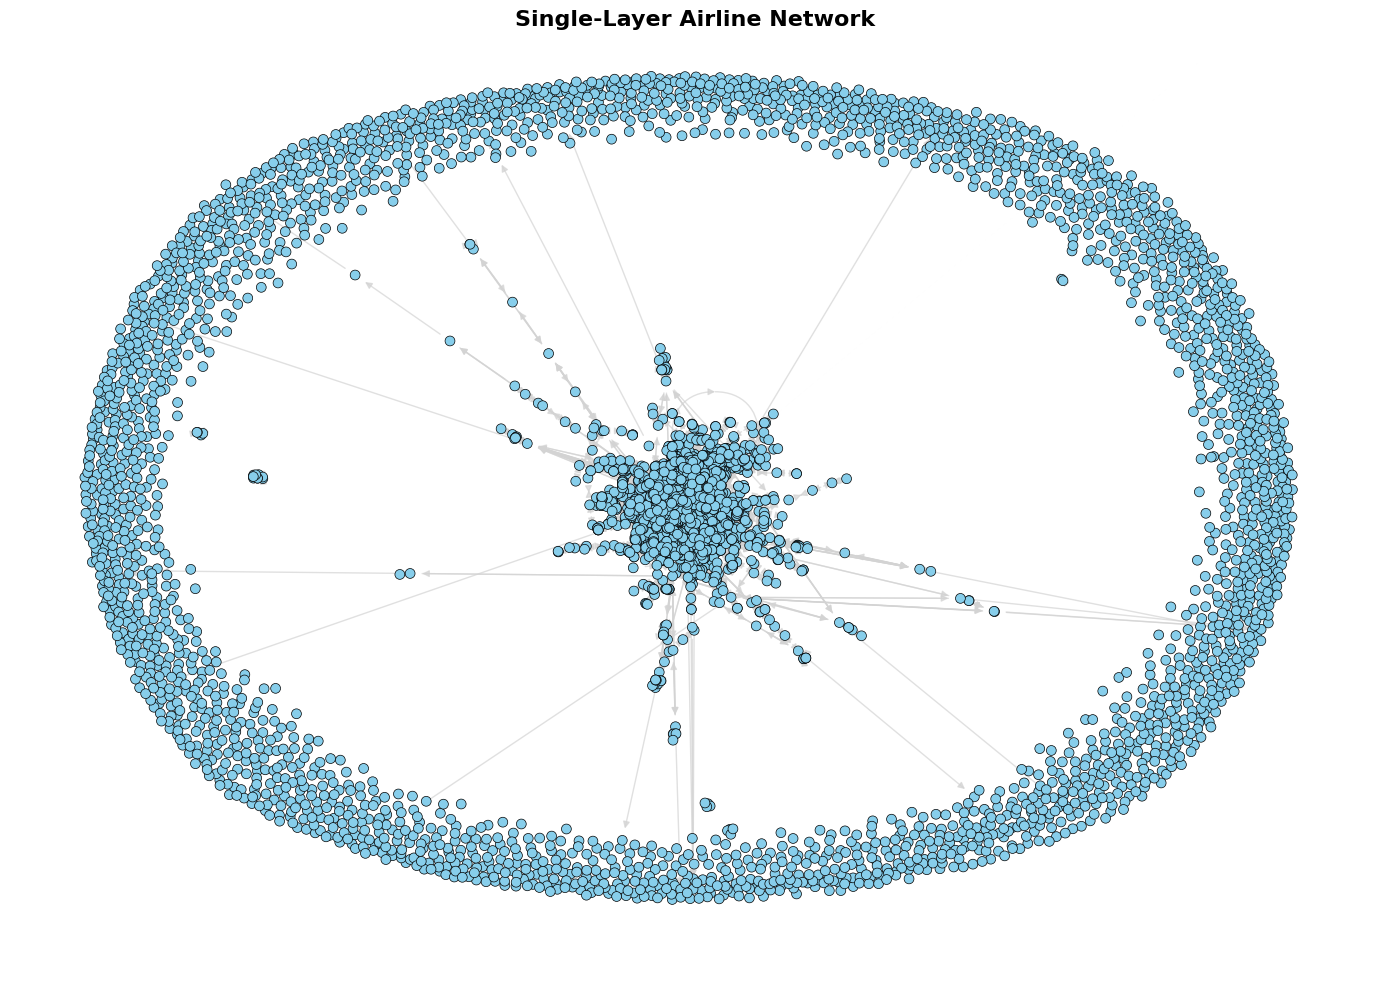

In [82]:
def visualize_graph(graph, title="Graph Visualization"):
    plt.figure(figsize=(14, 10))
    
    # Define layout and properties
    pos = nx.spring_layout(graph, seed=42)  # Consistent layout for reproducibility
    node_sizes = [50 for _ in graph.nodes()]  # You can customize sizes based on properties
    edge_colors = "lightgray"
    node_colors = "skyblue"
    
    # Draw edges and nodes with distinct styles
    nx.draw_networkx_edges(graph, pos, alpha=0.7, edge_color=edge_colors)
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, edgecolors="k", linewidths=0.5)
    
    # Add title and improve margins
    plt.title(title, fontsize=16, fontweight="bold")
    plt.axis("off")  # Hide axes for clarity
    plt.tight_layout()
    
    # Show the graph
    plt.show()
visualize_graph(G, "Single-Layer Airline Network")

##### Weighted Edge Assignment

In [ ]:
# Function to compute weights and assign them to graph edges
def assign_weights_to_edges(graph, coords):
    for source, target in graph.edges:
        source_coords = coords[source]
        target_coords = coords[target]

        # Compute geographic distance
        distance = geodesic(
            (source_coords['Latitude'], source_coords['Longitude']),
            (target_coords['Latitude'], target_coords['Longitude'])
        ).kilometers

        # Assign weight to the edge
        graph[source][target]['weight'] = distance

# Function to save the graph to a file
def save_graph(graph, file_name):
    try:
        nx.write_gml(graph, file_name)
        print(f"Graph successfully saved to {file_name}.")
    except Exception as e:
        print(f"Error saving graph to {file_name}: {e}")

# Function to print sample edges with weights
def print_sample_edges_with_weights(graph, sample_size=5):
    print("\nSample Edges with Weights:")
    for edge in list(graph.edges(data=True))[:sample_size]:
        print(edge)

# Assign weights to edges
assign_weights_to_edges(G, airport_coords)

# Save the graph
save_graph(G, f'{data_path}single_layer_network.gml')

# Print sample edges with weights
print_sample_edges_with_weights(G)


Graph successfully saved to single_layer_network.gml.

Sample Edges with Weights:
('GKA', 'HGU', {'weight': 124.58232437170456})
('GKA', 'LAE', {'weight': 157.16009340927107})
('GKA', 'MAG', {'weight': 106.24895852093672})
('GKA', 'POM', {'weight': 422.9313380479839})
('MAG', 'GKA', {'weight': 106.24895852093672})


##### Multilayer Network Construction

In [ ]:
# Function to create a multilayer graph
def create_multilayer_graph(airports, routes, layers, coords):
    MLG = nx.MultiGraph()

    # Add nodes (airports remain the same across layers)
    for row in airports.itertuples():
        MLG.add_node(row.IATA, name=row.Name, country=row.Country)

    # Add edges for each layer
    for layer in layers:
        valid_routes = routes[(routes['Source'].isin(coords)) & (routes['Destination'].isin(coords))]
        MLG.add_edges_from(
            [(row.Source, row.Destination, {'layer': layer}) for row in valid_routes.itertuples()]
        )

    return MLG

# Function to display edges count by layer
def display_edges_by_layer(graph, layers):
    for layer in layers:
        edges_in_layer = [(u, v, d) for u, v, d in graph.edges(data=True) if d['layer'] == layer]
        print(f"Edges in {layer} layer: {len(edges_in_layer)}")

# Function to save the multilayer graph
def save_multilayer_graph(graph, file_name):
    try:
        nx.write_gml(graph, file_name)
        print(f"Multilayer graph successfully saved to {file_name}.")
    except Exception as e:
        print(f"Error saving multilayer graph to {file_name}: {e}")

# Define layers
layers = ['Passenger', 'Crew', 'Aircraft']

# Create the multilayer graph
MLG = create_multilayer_graph(airports, routes, layers, airport_coords)

# Display edges count by layer
display_edges_by_layer(MLG, layers)

# Save the multilayer graph
save_multilayer_graph(MLG, f'{data_path}multilayer_network.gml')


Edges in Passenger layer: 66934
Edges in Crew layer: 66934
Edges in Aircraft layer: 66934
Multilayer graph successfully saved to multilayer_network.gml.


##### Calculate Robustness Metrics

In [85]:
# Function to calculate robustness metrics
def calculate_robustness(graph, layer_name, max_nodes=None):
    original_connected_components = nx.number_connected_components(graph)
    print(f"\n{layer_name} Layer - Initial Connected Components: {original_connected_components}")

    robustness_results = []
    nodes_to_process = list(graph.nodes)[:max_nodes] if max_nodes else list(graph.nodes)

    for node in nodes_to_process:
        graph_copy = graph.copy()
        graph_copy.remove_node(node)
        components = nx.number_connected_components(graph_copy)
        robustness_results.append((node, components))
        print(f"Removed {node}: Connected Components = {components}")

    return robustness_results

# Function to prepare a graph for robustness analysis
def prepare_layer_graph(multilayer_graph, layer_name):
    layer_edges = [(u, v) for u, v, d in multilayer_graph.edges(data=True) if d['layer'] == layer_name]
    layer_graph = nx.Graph()
    layer_graph.add_edges_from(layer_edges)
    return layer_graph

# Robustness analysis for each layer
for layer in ['Passenger', 'Crew', 'Aircraft']:
    layer_graph = prepare_layer_graph(MLG, layer)

    print(f"\nRobustness Analysis for {layer} Layer")
    robustness_results = calculate_robustness(layer_graph, layer, max_nodes=50)



Robustness Analysis for Passenger Layer

Passenger Layer - Initial Connected Components: 7
Removed GKA: Connected Components = 7
Removed HGU: Connected Components = 7
Removed LAE: Connected Components = 7
Removed MAG: Connected Components = 7
Removed POM: Connected Components = 11
Removed WWK: Connected Components = 7
Removed MAS: Connected Components = 7
Removed VAI: Connected Components = 7
Removed MXH: Connected Components = 7
Removed TBG: Connected Components = 7
Removed TIZ: Connected Components = 7
Removed UNG: Connected Components = 7
Removed DAU: Connected Components = 7
Removed HKN: Connected Components = 7
Removed PNP: Connected Components = 7
Removed RAB: Connected Components = 7
Removed BNE: Connected Components = 9
Removed GUR: Connected Components = 7
Removed BUL: Connected Components = 7
Removed BUA: Connected Components = 7
Removed CEB: Connected Components = 9
Removed CMU: Connected Components = 7
Removed CNS: Connected Components = 12
Removed DPS: Connected Component

##### Analyze Delay Propagation

In [86]:
# Function to simulate delay propagation and analyze the impact
def simulate_delay_propagation(ml_graph, failure_layer, num_edges_to_remove=10):
    print(f"\nSimulating failures in {failure_layer} layer and analyzing impact:")

    # Extract edges of the failure layer
    layer_edges = [(u, v) for u, v, d in ml_graph.edges(data=True) if d['layer'] == failure_layer]
    if len(layer_edges) < num_edges_to_remove:
        print(f"Warning: {failure_layer} layer has fewer than {num_edges_to_remove} edges. Removing all available edges.")
        num_edges_to_remove = len(layer_edges)

    # Remove a subset of edges
    removed_edges = layer_edges[:num_edges_to_remove]  # Example: remove the first `num_edges_to_remove` edges
    failure_graph = nx.Graph()
    failure_graph.add_edges_from(layer_edges)
    failure_graph.remove_edges_from(removed_edges)

    # Measure impact on other layers
    for layer in set(d['layer'] for _, _, d in ml_graph.edges(data=True)):
        if layer != failure_layer:
            other_layer_edges = [(u, v) for u, v, d in ml_graph.edges(data=True) if d['layer'] == layer]
            other_layer_graph = nx.Graph()
            other_layer_graph.add_edges_from(other_layer_edges)

            # Calculate connectivity after failure
            connected_components = nx.number_connected_components(other_layer_graph)
            print(f"After failures in {failure_layer}, {layer} Layer Connected Components: {connected_components}")

# Simulate delay propagation for each layer
for failure_layer in set(d['layer'] for _, _, d in MLG.edges(data=True)):
    simulate_delay_propagation(MLG, failure_layer, num_edges_to_remove=10)



Simulating failures in Passenger layer and analyzing impact:
After failures in Passenger, Aircraft Layer Connected Components: 7
After failures in Passenger, Crew Layer Connected Components: 7

Simulating failures in Aircraft layer and analyzing impact:
After failures in Aircraft, Passenger Layer Connected Components: 7
After failures in Aircraft, Crew Layer Connected Components: 7

Simulating failures in Crew layer and analyzing impact:
After failures in Crew, Passenger Layer Connected Components: 7
After failures in Crew, Aircraft Layer Connected Components: 7


##### Compare Relative Importance of Layers

In [87]:
# Function to calculate centrality metrics for a specific layer
def calculate_layer_centrality(graph, layer_name, top_n=5):
    # Filter edges for the specified layer
    layer_edges = [(u, v) for u, v, d in graph.edges(data=True) if d['layer'] == layer_name]
    if not layer_edges:
        print(f"No edges found for layer '{layer_name}'. Skipping centrality calculation.")
        return {}

    # Create an undirected graph for the layer
    layer_graph = nx.Graph()
    layer_graph.add_edges_from(layer_edges)

    # Calculate centrality metrics
    degree_centrality = nx.degree_centrality(layer_graph)
    betweenness_centrality = nx.betweenness_centrality(layer_graph)

    # Get top nodes by centrality
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Log results
    print(f"\nCentrality Metrics for {layer_name} Layer:")
    print("Top Nodes by Degree Centrality:")
    for node, centrality in top_degree:
        print(f"  Node: {node}, Centrality: {centrality:.4f}")

    print("Top Nodes by Betweenness Centrality:")
    for node, centrality in top_betweenness:
        print(f"  Node: {node}, Centrality: {centrality:.4f}")

    return {
        'degree_centrality': top_degree,
        'betweenness_centrality': top_betweenness
    }

# Compute centrality metrics for each layer dynamically
def compute_centrality_for_all_layers(graph, layers):
    results = {}
    for layer in layers:
        results[layer] = calculate_layer_centrality(graph, layer)
    return results

# Dynamically extract layers from the graph
layers = set(d['layer'] for _, _, d in MLG.edges(data=True))

# Compute centrality metrics for each layer
centrality_results = compute_centrality_for_all_layers(MLG, layers)



Centrality Metrics for Passenger Layer:
Top Nodes by Degree Centrality:
  Node: AMS, Centrality: 0.0762
  Node: FRA, Centrality: 0.0749
  Node: CDG, Centrality: 0.0737
  Node: IST, Centrality: 0.0722
  Node: ATL, Centrality: 0.0666
Top Nodes by Betweenness Centrality:
  Node: CDG, Centrality: 0.0636
  Node: LAX, Centrality: 0.0598
  Node: ANC, Centrality: 0.0577
  Node: DXB, Centrality: 0.0564
  Node: FRA, Centrality: 0.0522

Centrality Metrics for Aircraft Layer:
Top Nodes by Degree Centrality:
  Node: AMS, Centrality: 0.0762
  Node: FRA, Centrality: 0.0749
  Node: CDG, Centrality: 0.0737
  Node: IST, Centrality: 0.0722
  Node: ATL, Centrality: 0.0666
Top Nodes by Betweenness Centrality:
  Node: CDG, Centrality: 0.0636
  Node: LAX, Centrality: 0.0598
  Node: ANC, Centrality: 0.0577
  Node: DXB, Centrality: 0.0564
  Node: FRA, Centrality: 0.0522

Centrality Metrics for Crew Layer:
Top Nodes by Degree Centrality:
  Node: AMS, Centrality: 0.0762
  Node: FRA, Centrality: 0.0749
  Node: C

##### Visualize Results


Passenger Layer - Initial Connected Components: 7
Removed GKA: Connected Components = 7
Removed HGU: Connected Components = 7
Removed LAE: Connected Components = 7
Removed MAG: Connected Components = 7
Removed POM: Connected Components = 11
Removed WWK: Connected Components = 7
Removed MAS: Connected Components = 7
Removed VAI: Connected Components = 7
Removed MXH: Connected Components = 7
Removed TBG: Connected Components = 7
Removed TIZ: Connected Components = 7
Removed UNG: Connected Components = 7
Removed DAU: Connected Components = 7
Removed HKN: Connected Components = 7
Removed PNP: Connected Components = 7
Removed RAB: Connected Components = 7
Removed BNE: Connected Components = 9
Removed GUR: Connected Components = 7
Removed BUL: Connected Components = 7
Removed BUA: Connected Components = 7
Removed CEB: Connected Components = 9
Removed CMU: Connected Components = 7
Removed CNS: Connected Components = 12
Removed DPS: Connected Components = 8
Removed HIR: Connected Components =

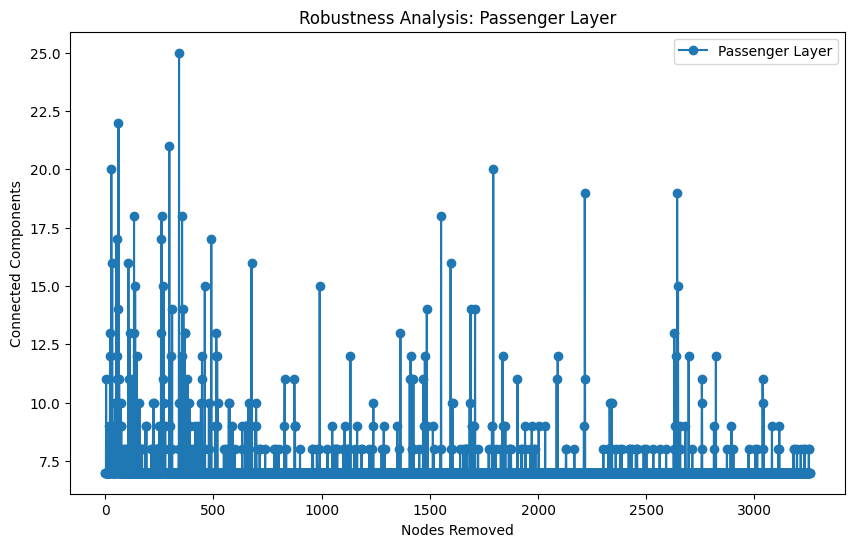

In [88]:
# Visualize delay propagation impact
def visualize_impact(layer_name, robustness_results):
    nodes = [result[0] for result in robustness_results]
    components = [result[1] for result in robustness_results]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(nodes)), components, marker='o', label=f'{layer_name} Layer')
    plt.title(f'Robustness Analysis: {layer_name} Layer')
    plt.xlabel('Nodes Removed')
    plt.ylabel('Connected Components')
    plt.legend()
    plt.show()

# Example: Visualizing robustness results for Passenger layer
robustness_results_passenger = calculate_robustness(layer_graph, 'Passenger')
visualize_impact('Passenger', robustness_results_passenger)


In [46]:
# Save cleaned datasets to CSV files
airports.to_csv('cleaned_airports.csv', index=False)
routes.to_csv('cleaned_routes.csv', index=False)
